In [1]:
### EOSPLOTS.IPYNB -- plots of twin-star EOSs and associated neutron star sequences

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

sns.set_palette('Set1',color_codes=True)

EOSDIR = './etc/'
PLTDIR = './plt/'
RESDIR = './dat/'

In [3]:
# parametric Lambda(m) model schematic

EOS_PATH = EOSDIR+'macro-SKI5_2009.csv'

eos_dat = np.genfromtxt(EOS_PATH,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
Ms = eos_dat['M']
Lambdas = eos_dat['Lambda']

Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
Ms = Ms[:Mmax_pos+1]
Mmax = Ms[-1]
Lambdas = Lambdas[:Mmax_pos+1]

onset = np.where(np.gradient(Ms) < 0.)[0][0]
offset = np.where(np.gradient(Ms) < 0.)[0][-1]

def Lambda_of_m(m,Lambda14=400.,Mtwin=1.6,Lgap=200.,LambdaMmax=3.):
    
    Lambda_hadron = Lambda14*(m/1.4)**(-6)
    
    Lambda_mmax = (Lambda14*(Mtwin/1.4)**(-6)- 2.*Lgap)*(mmax/Mtwin)**(-9) - LambdaMmax
    
    Lambda_hybrid = (Lambda14*(Mtwin/1.4)**(-6)- 2.*Lgap)*(m/Mtwin)**(-9) - Lambda_mmax*((m-Mtwin)/(mmax-Mtwin))
    
    return np.where(m > Mtwin,Lambda_hybrid,Lambda_hadron)

mmax = Mmax

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


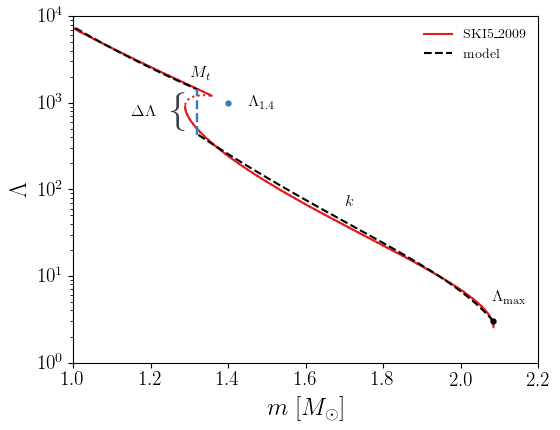

In [4]:
plt.figure(figsize=(6,4.5))

plt.plot(Ms,Lambdas,c=sns.color_palette()[0],ls=':')
plt.plot(Ms[:onset+1],Lambdas[:onset+1],c=sns.color_palette()[0])
plt.plot(Ms[offset:],Lambdas[offset:],c=sns.color_palette()[0],label=r'SKI5\_2009')

twin_pos = np.where(Ms >= 1.32)[0][0]
end_pos = len(Ms) - np.where(np.array(list(reversed(Ms))) < 1.32)[0][0]

#plt.plot(Ms,Lambda_of_m(Ms,1000.,1.32,500.,3.),c='k',ls=':')
plt.plot(Ms[:twin_pos],Lambda_of_m(Ms[:twin_pos],1000.,1.32,495.,3.),c='k',ls='--')
plt.plot(Ms[end_pos:],Lambda_of_m(Ms[end_pos:],1000.,1.32,495.,3.),c='k',ls='--',label=r'model')

plt.vlines(1.32,float(Lambda_of_m(Ms[end_pos],1000.,1.32,495.,3.)),float(Lambda_of_m(Ms[twin_pos-1],1000.,1.32,500.,3.)),color=sns.color_palette()[1],linestyle='--',lw=1.75, zorder=10)
plt.scatter(1.4,1000.,c=sns.color_palette()[1],marker='.',s=50,zorder=10)
plt.scatter(Mmax,3.,c='k',marker='.',s=50,zorder=10)

plt.yscale('log')
plt.xlim(1.,2.2)
plt.ylim(1.,1e4)
plt.xlabel(r'$m\;[M_{\odot}]$',size=18)
plt.ylabel(r'$\Lambda$',size=18)

plt.annotate(r'$\Lambda_{1.4}$',(1.45,900.),size=12)
plt.annotate(r'$M_t$',(1.3,2000.),size=12)
plt.annotate(r'$\Delta\Lambda$',(1.15,700.),size=12)
plt.annotate(r'$\lbrace$',(1.25,620.),size=28,alpha=0.75)
plt.annotate(r'$k$',(1.7,65.),size=12)
plt.annotate(r'$\Lambda_{\rm max}$',(2.08,5.),size=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(frameon=False)
plt.savefig(PLTDIR+'diagram_mLambda.png',bbox_inches="tight")

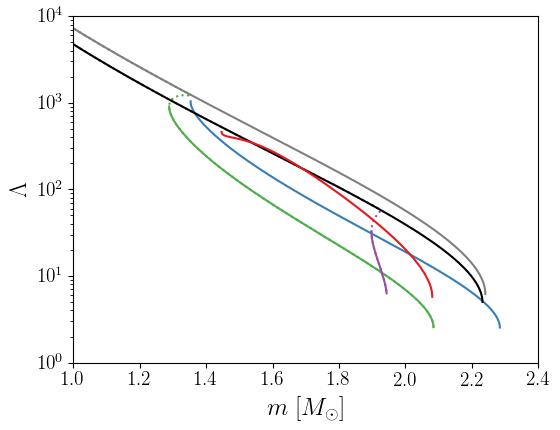

In [5]:
# Lambda(m) plot

eospaths = ['macro-SKI5.csv', 'macro-SKI5_2006.csv', 'macro-SKI5_2009.csv', 'macro-SK272.csv', 'macro-SK272_2506.csv', 'macro-SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,False,True,False,False,True]

plt.figure(figsize=(6,4.5))

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(EOSDIR+eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    Ms = eos_dat['M']
    Lambdas = eos_dat['Lambda']

    Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
    Ms = Ms[:Mmax_pos+1]
    Mmax = Ms[-1]
    Lambdas = Lambdas[:Mmax_pos+1]

    if twin[i]:
        onset = np.where(np.gradient(Ms) < 0.)[0][0]
        offset = np.where(np.gradient(Ms) < 0.)[0][-1]
        
        if dot[i]: plt.plot(Ms,Lambdas,c=colors[i],ls=':',zorder=-1)
        plt.plot(Ms[offset:],Lambdas[offset:],c=colors[i],ls=styles[i])
    
    else:
    
        plt.plot(Ms,Lambdas,c=colors[i],ls=styles[i])
             
plt.yscale('log')
plt.xlim(1.,2.4)
plt.ylim(1.,1e4)
plt.xlabel(r'$m\;[M_{\odot}]$',size=18)
plt.ylabel(r'$\Lambda$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(PLTDIR+'mLambda.png',bbox_inches="tight")

macro-SKI5_2006.csv 1.3532618103016045 0.008207220933622361
macro-SKI5_2009.csv 1.2883719119441943 0.0682755441885492
macro-SK272_2506.csv 1.446203851252245 0.005642693536559884
macro-SK272_3505.csv 1.8976158055388432 0.02675667793525105


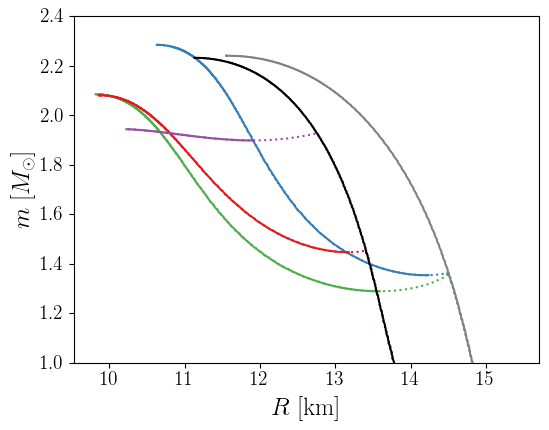

In [10]:
# m(R) plot

eospaths = ['macro-SKI5.csv', 'macro-SKI5_2006.csv', 'macro-SKI5_2009.csv', 'macro-SK272.csv', 'macro-SK272_2506.csv', 'macro-SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,True,True,False,True,True]

plt.figure(figsize=(6,4.5))

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(EOSDIR+eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    Ms = eos_dat['M']
    Rs = eos_dat['R']

    Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
    Ms = Ms[:Mmax_pos+1]
    Mmax = Ms[-1]
    Rs = Rs[:Mmax_pos+1]

    if twin[i]:
        onset = np.where(np.gradient(Ms) < 0.)[0][0]
        offset = np.where(np.gradient(Ms) < 0.)[0][-1]
        print(eospath,Ms[offset],Ms[onset]-Ms[offset])
        
        if dot[i]: plt.plot(Rs,Ms,c=colors[i],ls=':',zorder=-1)
        plt.plot(Rs[offset:],Ms[offset:],c=colors[i],ls=styles[i])
    
    else:
    
        plt.plot(Rs,Ms,c=colors[i],ls=styles[i])
             
plt.ylim(1.,2.4)
plt.ylabel(r'$m\;[M_{\odot}]$',size=18)
plt.xlabel(r'$R$ [km]',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(PLTDIR+'mR.png',bbox_inches="tight")

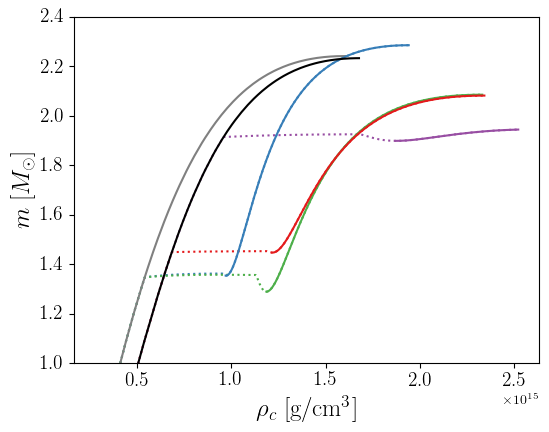

In [7]:
# m(rhoc) plot

eospaths = ['macro-SKI5.csv', 'macro-SKI5_2006.csv', 'macro-SKI5_2009.csv', 'macro-SK272.csv', 'macro-SK272_2506.csv', 'macro-SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,True,True,False,True,True]

plt.figure(figsize=(6,4.5))

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(EOSDIR+eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    Ms = eos_dat['M']
    rhocs = eos_dat['rhoc']

    Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
    Ms = Ms[:Mmax_pos+1]
    Mmax = Ms[-1]
    rhocs = rhocs[:Mmax_pos+1]

    if twin[i]:
        onset = np.where(np.gradient(Ms) < 0.)[0][0]
        offset = np.where(np.gradient(Ms) < 0.)[0][-1]
        
        if dot[i]: plt.plot(rhocs,Ms,c=colors[i],ls=':',zorder=-1)
        plt.plot(rhocs[offset:],Ms[offset:],c=colors[i],ls=styles[i])
    
    else:
    
        plt.plot(rhocs,Ms,c=colors[i],ls=styles[i])
             
plt.ylim(1.,2.4)
plt.ylabel(r'$m\;[M_{\odot}]$',size=18)
plt.xlabel(r'$\rho_c$ [g/cm$^3$]',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(PLTDIR+'mrhoc.png',bbox_inches="tight")

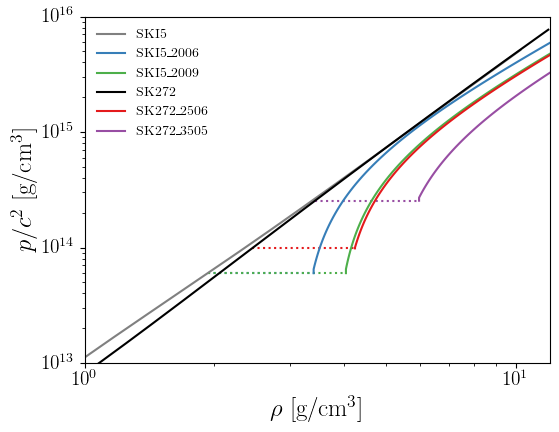

In [8]:
# eos plot

eospaths = ['SKI5.csv', 'SKI5_2006.csv', 'SKI5_2009.csv', 'SK272.csv', 'SK272_2506.csv', 'SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,True,True,False,True,True]
onsets = [0.,2.0,2.0,0.,2.5,3.5]
labels = [r'SKI5',r'SKI5\_2006',r'SKI5\_2009',r'SK272',r'SK272\_2506',r'SK272\_3505']

plt.figure(figsize=(6,4.5))

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(EOSDIR+eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    rhos = eos_dat['baryon_density']
    ps = eos_dat['pressurec2']
    
    if twin[i]:
        onset = np.where(rhos >= onsets[i]*2.8e14)[0][0]
        
        if dot[i]: plt.plot([rhos[onset-1]/2.8e14,rhos[onset]/2.8e14],[ps[onset-1],ps[onset-1]],c=colors[i],ls=':',zorder=-1)
        plt.plot([rhos[onset]/2.8e14]+list(rhos[onset:]/2.8e14),ps[onset-1:],c=colors[i],ls=styles[i],label=labels[i])
    
    else:
    
        plt.plot(rhos/2.8e14,ps,c=colors[i],ls=styles[i],label=labels[i])
        
plt.xscale('log')             
plt.yscale('log')
plt.xlim(1.,12.)
plt.ylim(1e13,1e16)
plt.ylabel(r'$p/c^2$ [g/cm$^3$]',size=18)
plt.xlabel(r'$\rho$ [g/cm$^3$]',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.savefig(PLTDIR+'eos.png',bbox_inches="tight")

In [9]:
# table of eos data

eospaths = ['macro-SKI5.csv', 'macro-SKI5_2006.csv', 'macro-SKI5_2009.csv', 'macro-SK272.csv', 'macro-SK272_2506.csv', 'macro-SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,True,True,False,True,True]

print('eos,MTOV,R14,L14,L14_hadronic,Mt,DeltaL')

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(EOSDIR+eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    Ms = eos_dat['M']
    Rs = eos_dat['R']
    Ls = eos_dat['Lambda']

    Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
    Ms = Ms[:Mmax_pos+1]
    Mmax = Ms[-1]
    Rs = Rs[:Mmax_pos+1]
    Ls = Ls[:Mmax_pos+1]
    
    R_of_m = scipy.interpolate.interp1d(Ms,Rs)
    R14 = R_of_m(1.4)
    
    L_of_m = scipy.interpolate.interp1d(Ms,Ls)
    L14 = L_of_m(1.4)
    
    if i != 0 and i != 3: twins_dat = np.genfromtxt(RESDIR+'unif_BNS_'+((eospath.split('-')[-1]).split('.')[0]).split('_')[0]+((eospath.split('-')[-1]).split('.')[0]).split('_')[-1]+'v0/'+((eospath.split('-')[-1]).split('.')[0]).split('_')[0]+((eospath.split('-')[-1]).split('.')[0]).split('_')[-1]+'_twinstarparameters.csv',names=True,delimiter=',',dtype=None,encoding=None)
    else: twins_dat = np.genfromtxt(RESDIR+'unif_BNS_'+((eospath.split('-')[-1]).split('.')[0]).split('_')[0]+'v0/'+((eospath.split('-')[-1]).split('.')[0]).split('_')[0]+'_twinstarparameters.csv',names=True,delimiter=',',dtype=None,encoding=None)
    L14_hadronic = twins_dat['L14']
    Mt = twins_dat['Mt']
    DeltaL = twins_dat['DeltaL']
    
    print(eospath,Mmax,R14,L14,L14_hadronic,Mt,DeltaL)

eos,MTOV,R14,L14,L14_hadronic,Mt,DeltaL
macro-SKI5.csv 2.2402793551205176 14.460027700000401 992.7319487991128 992.7319487991128 1.6201396775602588 0.0
macro-SKI5_2006.csv 2.2841023856504603 13.451300370863555 524.9961578670702 992.7319487991128 1.3573654207684158 339.8164505743979
macro-SKI5_2009.csv 2.0842015865025143 12.234352077095352 241.92885116519483 992.7319487991128 1.322509684038469 944.394123265442
macro-SK272.csv 2.231698735785573 13.452974218980714 646.8819948108993 646.8819948108993 1.6158493678927865 0.0
macro-SK272_2506.csv 2.0805842732835713 13.452974928832488 646.8598240719139 646.8819948108993 1.449025198020525 83.05515557357984
macro-SK272_3505.csv 1.943250113764034 13.452974218980714 646.8819948108993 646.8819948108993 1.9109941445064687 44.426423539885334
